### **Travel Insurance Claim Prediction with Logistic Regression**

## **1. Business Understanding**

Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita bepergian, baik di dalam negeri maupun luar negeri. Beberapa negara bahkan telah mewajibkan wisatawan untuk memiliki asuransi perjalanan, contohnya negara-negara di Eropa dan Amerika. Besarnya premi tergantung pada cakupan yang diinginkan, lamanya perjalanan, dan tujuan perjalanan.  Ada berbagai manfaat yang bisa kamu peroleh dari asuransi perjalanan.
-   Perlindungan medis :Kamu akan mendapatkan manfaat pengobatan di luar negeri, baik berupa penggantian biaya pengobatan (hospital benefit) maupun santunan tunai harian untuk rawat inap di luar negeri (cash plan).
-   Bantuan darurat : Menghadapi masalah di negeri orang pasti tidak menyenangkan. Asuransi perjalanan memberikan bantuan darurat jika kamu menghadapi hal tak terduga yang tidak menyenangkan di luar negeri. Bantuan darurat ini mencakup evakuasi medis, pemulangan jenazah, dan 24 jam hotline bantuan darurat.
-    Manfaat kecelakaan : Jika kamu mengalami kecelakaan di luar negeri, maka asuransi perjalanan akan memberikan santunan kecelakaan dan santunan cacat permanen.
-    Manfaat kunjungan dan perawatan : Manfaat ini memberikan penggantian biaya untuk satu orang kerabat atau keluarga untuk tinggal bersama atau melakukan perjalanan bersama jika nasabah dirawat di luar negeri.
-    Ketidaknyamanan perjalanan : Risiko yang juga mengintai seseorang bila bepergian ialah risiko barang rusak atau hilang, serta keterlambatan penerbangan. Dengan memiliki asuransi perjalanan, maka kamu akan memperoleh perlindungan atas kerusakan dan kehilangan bagasi, uang, dan dokumen yang hilang selama perjalanan, atau luka akibat huru-hara atau terorisme.
-    pembatalan perjalanan.

## **2. Business Problem**

**Pengelolaan Risiko yang Kurang Optimal**
- Tanpa data yang tepat dan prediksi yang akurat, perusahaan asuransi mungkin kesulitan dalam mengelola risiko. Hal ini mencakup perhitungan berapa jumlah premi yang harus dikumpulkan dan berapa banyak klaim yang akan datang, serta bagaimana mendistribusikan dana untuk pembayaran klaim.

**Layanan Pelanggan**
- Kualitas layanan pelanggan dalam menangani klaim juga menjadi tantangan. Pelanggan mengharapkan proses klaim yang cepat dan efisien. Jika terjadi keterlambatan atau ketidakpuasan, hal ini bisa menyebabkan hilangnya pelanggan dan menurunnya reputasi perusahaan

## **3. Goals of Prediction Claim**
Goal utama dari pembuatan prediksi menggunakan machine learning pada asuransi perjalanan adalah untuk meningkatkan efisiensi dan profitabilitas perusahaan dengan meminimalkan risiko klaim yang salah dan meningkatkan akurasi dalam memprediksi siapa yang akan mengajukan klaim.

## **4. Metrics Evaluation**

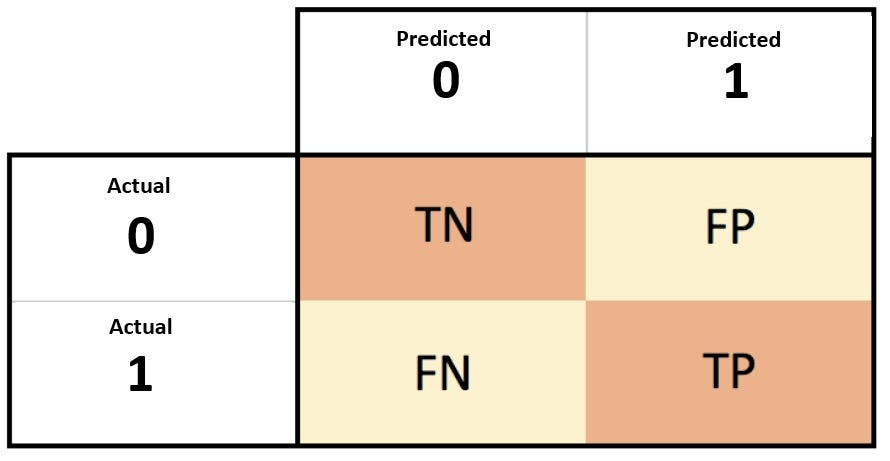



- FP : ML memprediksi bahwa tertanggung (pemegang polis) akan melakukan klaim asuransi perjalanan (berhak menerima klaim), padahal tertanggung tidak melakukan klaim (tidak berhak menerima klaim).
    - konsekuensi : Perusahaan asuransi perjalanan membayar biaya pemrosesan dan inspeksi klaim tanpa adanya klaim yang valid. (biaya administrasi, verifikasi dokumen, dan tenaga kerja yang digunakan untuk menilai klaim tersebut).
    - Biaya : sebagai contoh biaya yang ditanggung untuk inspeksi adalah $200.
- FN : ML memprediksi bawah tertanggung tidak melakukan claim(tidak berhak atas klaim), padahal tertanggung memiliki hak dan mengajukan claim. 
    - konsekuensi : Perusahaan tidak hanya harus membayar klaim asuransi yang tidak terduga, tetapi juga menanggung biaya pemrosesan dan inspeksi klaim. Ini lebih mahal karena klaim yang seharusnya terprediksi telah lolos tanpa diantisipasi.
    - Biaya : klaim perjalanan memiliki variasi biaya tergantung kepada jenis klaim yang diajukan (pembatalan perjalanan, evakuasi medis, dll). sebagai contoh rata - rata klaim adalah $4854 ditambah biaya inspeksi sebesar $200. total nya adalah $5054.
    (https://www.streetinsider.com/PRNewswire/Travel+Insurance+Claims+Paid+Out+6X+Policy+Premium+in+2023/22962975.html)

Biaya untuk mempersiapkan Pemegang polis akan mengajukan klaim dan berhak menerima klaim lebih besar dari pada Biaya untuk melakukan inspeksi pada pemegang polis yang diprediksi mengajukan tanpa adanya klaim yang valid. Dengan kata lain cost FN lebih besar. Maka dari itu metric yang dipakai adalah **<u>Recall</u>**.

In [1]:
# import library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats

# splitting data
from sklearn.model_selection import train_test_split

# import library preprocessing
# missing value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# scaling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# column transform
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# modeling
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# ensemble various
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics evaluation: accuracy
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

## **5. Data Understanding**

Dictionary:
- Agency: Nama dari agen asuransi perjalanan.
- Agency Type: Jenis dari agen asuransi perjalanan.
- Distribution Channel: Saluran distribusi yang digunakan oleh agen asuransi perjalanan.
- Product Name: Nama produk asuransi perjalanan.
- Gender: Jenis kelamin dari orang yang diasuransikan.
- Duration: Durasi atau lamanya perjalanan.
- Destination: Tujuan perjalanan.
- Net Sales: Jumlah penjualan polis asuransi perjalanan.
- Commission (in value): Komisi yang diterima oleh agen asuransi perjalanan.
- Age: Usia dari orang yang diasuransikan.
- Claim: Status klaim (apakah klaim telah diajukan atau tidak).

In [2]:
df = pd.read_csv('data_travel_insurance.csv')
df.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


**Melakukan pengecekan tipe data pada masing-masing kolom.**
- setiap kolom sudah memiliki tipe data yang sesuai. pada kolom gender terdapat jumlah data yang berbeda dibanding dengan kolomm lainnya.

In [3]:
# Melakukan pengecekan tipe data pada masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


**Mengubah nama kolom Commision (in value) menjadi commision, hal ini dilakukan agar lebih mudah dalam mengolah data dan mudah dibaca**

In [4]:
# Mengubah nama kolom commision (in value)
df.rename(columns={'Commision (in value)': 'Commision'}, inplace=True)

**Melakukan identifikasi terhadap duplikasi data.**
- Terdapat 4667 data duplikat. data tersebut sudah di handle dan menghasilkan data yang unique.

In [5]:
# Mengecek data duplikasi
df.duplicated().sum()


4667

In [6]:
# delete data yang duplikat
df.drop_duplicates(inplace=True)

**Melakukan identifikasi prosentase missing value pada setiap kolom.**
- terdapat missing value sebesar hampir 70% pada kolom gender. Penanganan missing value akan dilakukan pada tahap preprocessing

In [7]:
# Mengidentifikasi missing value pada setiap kolom.
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  27667
Duration                    0
Destination                 0
Net Sales                   0
Commision                   0
Age                         0
Claim                       0
dtype: int64

In [8]:
# Kolom gender memiliki nilai missing value sebesar hampir 70% 
df.isna().sum()/len(df)*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  69.758705
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision                0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

**Melakukan identifikasi secara mendalam mengenai informasi yang tersedia pada setiap kolom.**

In [9]:
# Mengidentifikasi type, missing value, nilai unique, duplicate pada data set df.
print(df.shape)

# untuk melihat semua nilai
pd.set_option('display.max_colwidth', None)

nilai_unique = df.apply(lambda x: x.unique())

info = pd.DataFrame({'type' : df.dtypes,
              'null' : df.isna().sum(),
              'unique' : df.nunique(),
              'duplicate' : df.duplicated().sum(),
              'nilai unique' : nilai_unique}
              )
info

(39661, 11)


,type,null,unique,duplicate,nilai unique
Agency,object,0,16,0,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
Agency Type,object,0,2,0,"[Airlines, Travel Agency]"
Distribution Channel,object,0,2,0,"[Online, Offline]"
Product Name,object,0,26,0,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
Gender,object,27667,2,0,"[F, nan, M]"
Duration,int64,0,437,0,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
Destination,object,0,138,0,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
Net Sales,float64,0,1006,0,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
Commision,float64,0,915,0,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
Age,int64,0,89,0,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 

**Mengidentifikasi tipe data numerik pada dataset dengan .describe()**
- **Ditemukan anomali dari deksripsi data numerik diatas, yaitu:**
    - Duration : kita asumsikan nilai ini sebagai hari. rentang durasi perjalanan pada data ini adalah (-1) sampai 4881 days. Terdapat nilai anomali pada (-1 day), 0 days dan 4881 days pada durasi perjalanan. Durasi perjalanan selalu bernilai positif, tidak ada nilai perjalanan yang dilakukan 0 hari bahkan -1 days. Berdasarkan knowledge business dari asuransi perjalanan, terdapat batas minimum dan maksimum hari yang akan dicover jika terjadi claim. Asuransi travel untuk single-day trip memiliki batas minimum 1 hari, dan pada agency asuransi travel, beberapa dari mereka ada yang memberikan batas maksimum hari perjalanan selama 365 hari. Artinya ketiga nilai ini (-1, 0 dan 4881) adalah outliers.  Berikut link untuk contoh asuransi travel yang mengcover perjalanan selama 1 tahun untuk (long stay travel):
https://www.allcleartravel.co.uk/long-stay/

    - Net Sales : Pada umunya nilai net sales pada penjuaan polis tidak seharusnya negatif, tapi ada beberapa hal pengecualian seperti, diskon atau pembatalan polis, untuk hal ini harus dianalisis lebih lanjut. Oleh karena minimnya informasi pada data untuk analisa lebih lanjut, nilai negatif pada Net Sales akan dinilai sebagai outliers/anomaly pada data.

    - Age : Rentang usia pada data ini adalah 0 - 118 tahun. Berdasarkan knowledge business, usia yang dapat ditanggung adalah 0 - 85 tahun. Sehingga nilai diatas 85 tahun dapat dikatan sebagai outliers. Batasan umur yang di-cover oleh asuransi perjalanan dapat bervariasi tergantung pada kebijakan masing-masing perusahaan asuransi. Namun, secara umum, beberapa aturan mengenai batas umur untuk travel insurance adalah:
        - Usia Minimum: Biasanya ada usia minimum seperti 1-3 bulan setelah kelahiran bagi bayi untuk dapat masuk dalam polis asuransi perjalanan. 
        - Anak-anak: Biasanya anak-anak yang sudah lahir hingga usia tertentu, seperti 17 atau 18 tahun, dapat diasuransikan dalam polis keluarga atau bersama orang tua.
        - Dewasa: Usia dewasa yang biasanya di-cover oleh asuransi perjalanan bisa mulai dari 18 tahun hingga sekitar 65 atau 70 tahun.
        - Lansia (Senior): Banyak asuransi perjalanan menawarkan cakupan untuk orang yang berusia di atas 65 tahun, namun sering kali terdapat batas maksimum, misalnya hingga 85   tahunBeberapa polis mungkin tidak mencakup lansia di atas batas usia tertentu atau mengenakan premi yang lebih tinggi.
        - Berikut link untuk batasan maksimum umur yang dicover oleh asurasi perjalanan : https://www.allianz-assistance.ae/en_AE/travel-insurance-products/travel-insurance-for-seniors.html#:~:text=Our%20Allianz%20travel%20insurance%20products,no%20matter%20where%20they%20live.
- **Anomali ini akan di cleaning pada tahapan data cleaning.**

In [10]:
# Mengidentifikasi informasi nilai numerik
df.describe()

,Duration,Net Sales,Commision,Age
count,39661.000000,39661.000000,39661.000000,39661.000000
mean,52.397822,42.342794,10.442622,39.930284
std,113.542824,50.025244,20.355921,13.526346
min,-1.000000,-357.500000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


In [11]:
# Melihat detail kolom duration yang memiliki nilai negatif
df[df['Duration'] < 1]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
242,JZI,Airlines,Online,Basic Plan,M,0,CHINA,22.00,7.70,34,No
1782,SSI,Airlines,Online,Ticket Protector,NaN,0,SINGAPORE,1.80,0.50,48,No
1853,JWT,Airlines,Online,Value Plan,M,0,INDIA,62.00,24.80,118,No
2558,SSI,Airlines,Online,Ticket Protector,NaN,0,SINGAPORE,9.77,2.74,48,No
3236,LWC,Travel Agency,Online,Single Trip Travel Protect Gold,F,0,INDIA,35.25,22.91,24,No
3406,SSI,Airlines,Online,Ticket Protector,NaN,0,SINGAPORE,2.86,0.80,48,No
3549,JZI,Airlines,Online,Basic Plan,M,0,VIET NAM,18.00,6.30,58,No
3591,JZI,Airlines,Online,Basic Plan,F,0,MYANMAR,18.00,6.30,26,No
3753,JWT,Airlines,Online,Value Plan,M,0,INDIA,31.00,12.40,118,No
4939,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,0,UNITED STATES,9.90,5.94,59,No


In [12]:
# Melihat detail kolom net sales yang memiliki nilai negatif
df[df['Net Sales'] < 0]


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
94,C2B,Airlines,Online,Annual Silver Plan,M,365,SINGAPORE,-216.75,54.19,36,No
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,430,AUSTRALIA,-59.40,35.64,41,No
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,77,JAPAN,-29.70,17.82,59,No
199,EPX,Travel Agency,Online,Cancellation Plan,NaN,29,HONG KONG,-12.00,0.00,36,No
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,57,AUSTRALIA,-59.40,35.64,28,No
...,...,...,...,...,...,...,...,...,...,...,...
43694,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,140,UNITED STATES,-98.00,0.00,29,No
43743,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,23,MALAYSIA,-29.70,17.82,29,No
43751,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,147,SPAIN,-68.00,0.00,36,No
43858,EPX,Travel Agency,Online,Cancellation Plan,NaN,49,UNITED KINGDOM,-68.00,0.00,36,No


In [13]:
df[df['Age'] > 85]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
99,ART,Airlines,Online,Value Plan,M,7,MALAYSIA,29.0,10.15,118,No
105,JZI,Airlines,Offline,Basic Plan,NaN,16,INDONESIA,37.0,12.95,118,No
363,JWT,Airlines,Online,Value Plan,F,12,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,M,6,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,F,76,INDIA,100.0,40.00,118,No
...,...,...,...,...,...,...,...,...,...,...,...
43846,JWT,Airlines,Online,Value Plan,F,25,INDIA,31.0,12.40,118,No
43856,JWT,Airlines,Online,Value Plan,M,10,INDIA,50.0,20.00,118,Yes
43928,JWT,Airlines,Online,Value Plan,M,83,INDIA,180.0,72.00,118,No
44089,JWT,Airlines,Online,Value Plan,M,42,INDIA,31.0,12.40,118,No


## **6.Data Cleaning**

**Mengidentifikasi nilai outliers pada dataset asuransi travel**
- Boxplot:
    - Hasil dari visualisasi boxplot: 
        - terdapat outliers pada lower bound dan upper bound pada kolom Net Sales dan Ages.
        - terdapat outliers pada upper bound pada kolom Commision dan Duration.
- Skewness dan Kurtosis:
    - nilai skewnes dan kurtosis pada semua kolom numerik berada diatas dari nilai normal, artinya memiliki distribusi tidak normal.

Skewness of Duration: 24.337918541678437
Kurtosis of Duration: 975.1353327681429


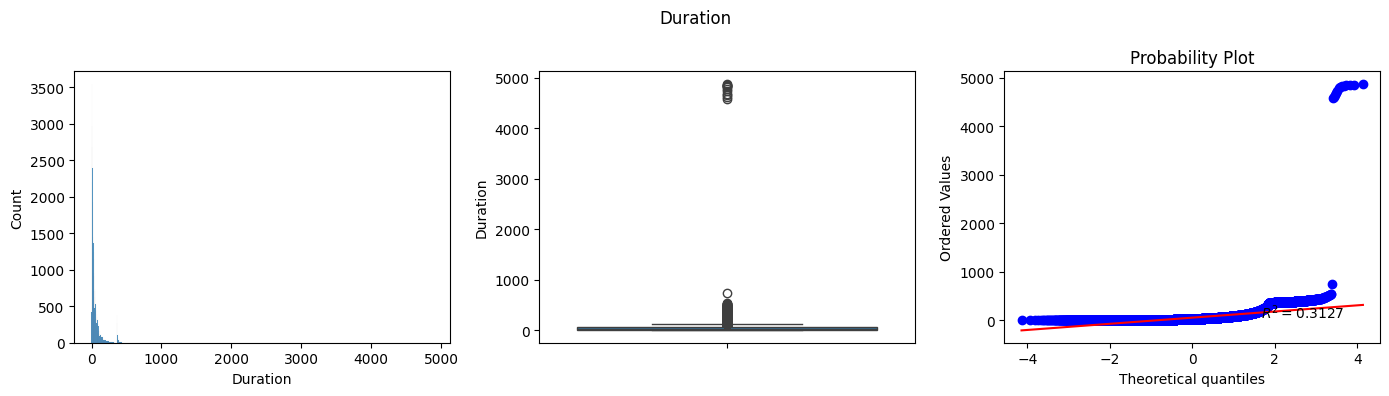

Skewness of Net Sales: 3.2093319434807923
Kurtosis of Net Sales: 18.778520162857312


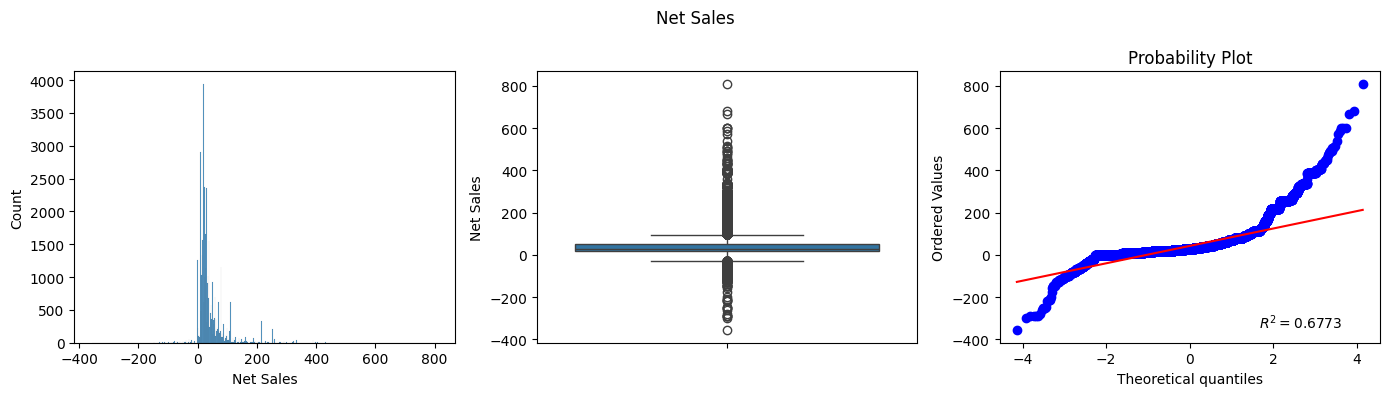

Skewness of Commision: 3.9160831256182216
Kurtosis of Commision: 23.703904257834065


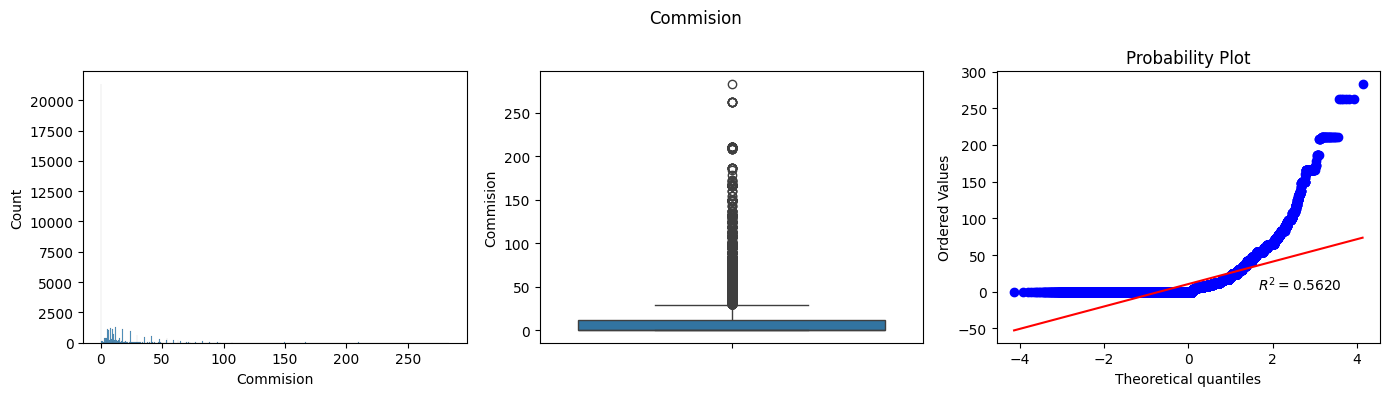

Skewness of Age: 2.7058001270246916
Kurtosis of Age: 11.904058277071833


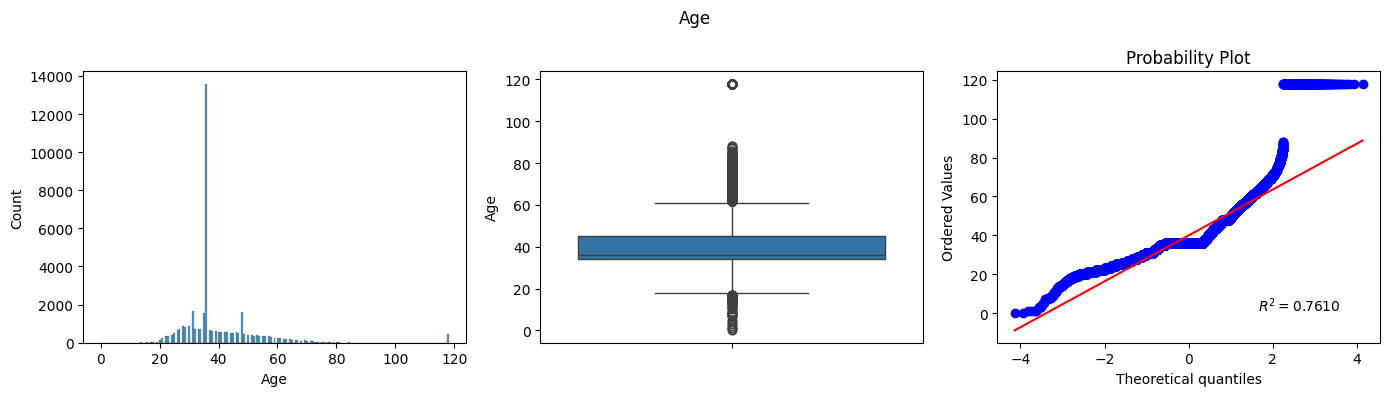

In [14]:
for col in df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.histplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col],plot=plt,rvalue=True,dist='norm')
    plt.suptitle(col)
    plt.tight_layout()
    plt.show();

**Menghitung jumlah outliers, persentase outliers dan batas lower bound dan upper bound pada kolom numerik**
-   **Persentase outliers dari masing2 feature adalah 5 - 10 % total data. jika kita menghandle outliers ini, kita akan membuang (+/-) 13000 baris, dan ini akan berpengaruh ketika kita membuat model.**
    - Kita akan coba menghandle nilai outliers ini berdasarkan domain knowledge yang saya dapatkan dari beberapa website terkait asuransi travel:
        - Usia > 85 akan dianggap sebagai outliers, karena asuransi travel memiliki batas maksimum usia untuk claim adalah 85.
        - tertanggung yang memiliki durasi perjalana -1, 0 dan 4881 hari akan diremove dari data, karena durasi perjalan bernilai positif dengan minimum durasi perjalan 1 hari dan maximum perjalanan 365 hari yang dapat di claim polisnya.
        - Pada umunya nilai net sales pada penjualan polis tidak seharusnya negatif, tapi ada beberapa hal pengecualian seperti, diskon atau pembatalan polis, untuk hal ini harus dianalisis lebih lanjut. Oleh karena minimnya informasi pada data untuk analisa lebih lanjut, nilai negatif pada Net Sales akan dinilai sebagai outliers/anomaly pada data.
        - untuk commision kita akan menghandle menggunakan winsorize, di mana nilai-nilai ekstrem (baik yang sangat rendah maupun sangat tinggi) diubah (dibatasi) ke dalam suatu rentang tertentu, daripada dihilangkan. Winsorization menjaga agar data tetap ada, tetapi memodifikasi nilai-nilai ekstrem untuk mencegah dampak outliers yang signifikan terhadap analisis atau model statistik.

In [15]:
# Menghitung nilai outliers
def deteksi_outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [16]:
nilai_outliers = []

kolom = ['Duration', 'Net Sales', 'Commision', 'Age']

for feature in kolom :
    outliers, lower_bound, upper_bound = deteksi_outlier(df, feature)
    total_outlier = len(outliers)
    outlier_percentage = round(total_outlier / len(df[kolom]) * 100, 2)
    nilai_outliers.append([feature, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_summary = pd.DataFrame(nilai_outliers, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_summary

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,Duration,3495,8.81,-58.00,126.0
1,Net Sales,3597,9.07,-27.50,96.5
2,Commision,4084,10.30,-17.82,29.7
3,Age,2303,5.81,17.50,61.5


In [17]:
# total_outliers secara keseluruhan
outlier_summary['Total Outliers'].sum()

13479

**Proses remove outliers pada setiap kolom numerik**

In [18]:
# remove net sales yang memiliki nilai negatif
df_travel = df[df['Net Sales'] > 0]

# remove usia pemegang polis yang memiliki umur diatas 85 tahun
df_travel = df_travel[df_travel['Age'] < 86]

# remove durasi travel yang bernilai -1, 0 dan diatas 365 hai
df_travel = df_travel[(df_travel['Duration'] > 0) & (df_travel['Duration'] < 366)]

In [19]:
# melakukan pengecekan nilai maksimum pada commision sebelum dihandle outliernya
df_travel['Commision'].max()

262.76

In [20]:
# import library winorization
from scipy.stats.mstats import winsorize

# menghandle outliers pada kolom commision menggunakan Winsorize
df_travel['Commision'] = winsorize(df_travel['Commision'], limits=[0.01, 0.01])

In [21]:
df_travel['Commision'].max()

77.22

**Melakukan pengecekan untuk setiap kolom numerik untuk memastikan outliers sudah dihandle**
- data outliers sudah berhasil di handle

In [22]:
df_travel.describe()

,Duration,Net Sales,Commision,Age
count,36573.000000,36573.000000,36573.000000,36573.000000
mean,43.019413,40.464945,8.071783,38.920515
std,56.258028,38.217461,14.685241,10.354902
min,1.000000,0.190000,0.000000,0.000000
25%,10.000000,20.000000,0.000000,35.000000
50%,24.000000,29.000000,0.000000,36.000000
75%,53.000000,49.500000,10.000000,44.000000
max,365.000000,682.000000,77.220000,85.000000


**Melakukan reset index**

In [23]:
df_travel.reset_index(inplace=True)

In [24]:
df_travel.drop(columns='index', inplace=True)

In [25]:
df_travel

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
36568,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,6,THAILAND,40.0,0.00,36,No
36569,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
36570,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
36571,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No


**Membandingkan nilai outliers debelum dan sesudah dihandle pada kolom numerik menggunakan histogram dan boxplot** 

<Axes: xlabel='Net Sales'>

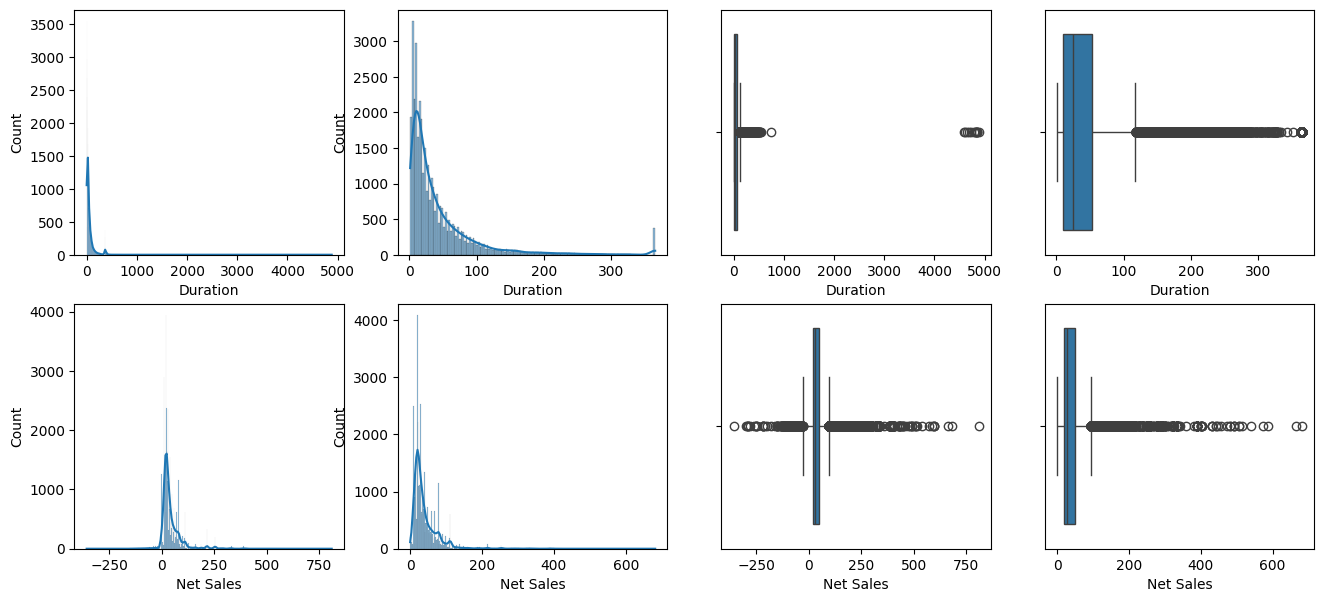

In [26]:
# Membandingkan penyebaran setiap data numerik sebelum dan sesudah outlier di handle
fig, axes = plt.subplots(nrows = 2, ncols=4, figsize=(16,7))

# Duration
sns.histplot(df['Duration'], kde=True, ax=axes[0,0])
sns.histplot(df_travel['Duration'], kde=True, ax = axes[0,1])
sns.boxplot(df, x = 'Duration', ax=axes[0,2])
sns.boxplot(df_travel, x = 'Duration', ax=axes[0,3])

# Net Sales
sns.histplot(df['Net Sales'], kde=True, ax=axes[1,0])
sns.histplot(df_travel['Net Sales'], kde=True, ax = axes[1,1])
sns.boxplot(df, x = 'Net Sales', ax=axes[1,2])
sns.boxplot(df_travel, x = 'Net Sales', ax=axes[1,3])


<Axes: xlabel='Age'>

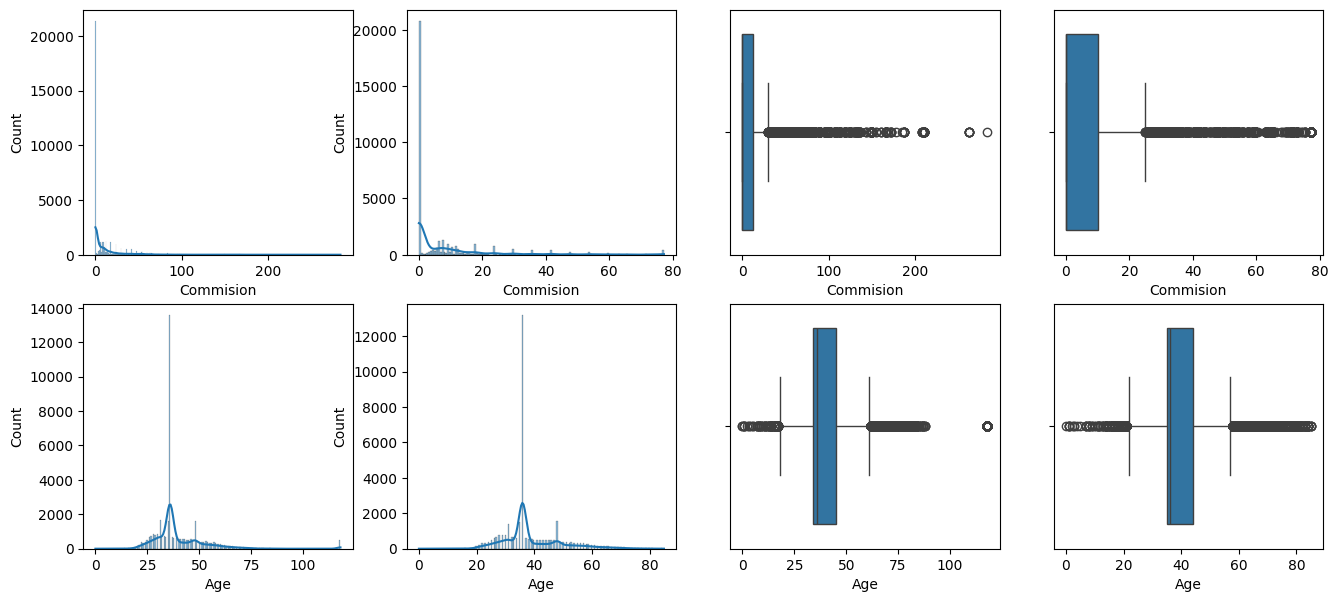

In [27]:
# Membandingkan penyebaran setiap data numerik sebelum dan sesudah outlier di handle
fig, axes = plt.subplots(nrows = 2, ncols=4, figsize=(16,7))

# Commision
sns.histplot(df['Commision'], kde=True, ax=axes[0,0])
sns.histplot(df_travel['Commision'], kde=True, ax = axes[0,1])
sns.boxplot(df, x = 'Commision', ax=axes[0,2])
sns.boxplot(df_travel, x = 'Commision', ax=axes[0,3])

# Net Sales
sns.histplot(df['Age'], kde=True, ax=axes[1,0])
sns.histplot(df_travel['Age'], kde=True, ax = axes[1,1])
sns.boxplot(df, x = 'Age', ax=axes[1,2])
sns.boxplot(df_travel, x = 'Age', ax=axes[1,3])

## **7. Exploratory Data Analysis**
- Langkah ini akan diskip karena telah dilakukan pada file utama yang menggunakan Adaboost_Smote. Notebook ini hanya digunakan untuk melihat nilai akurasi menggunakan algoritma Logistic Regression dengan mengunakan Oversampling techinique SMOTE. Hal ini dikarenakan nilai ini bagus pada saaat mencari model benchmark pada notebook Adaboost Smote.

## **8. Preprocessing Data**

- **Pada kolom Age, kita akan melakukan binning. Tujuannya adalah agar ketika ada data outliers ekstrem jaraknya menjadi dekat karena telah dikategorikan.**
kita akan mebuat binning age sesuai dengan rentang umum usia yang digunakan dalam polis asuransi travel.
    - Infant (Bayi): 0-2 tahun. Bayi biasanya tidak dikenakan premi atau diberikan perlindungan gratis dalam polis yang sama dengan orang tua.
    - Child (Anak-anak): 2-17 tahun. Kelompok ini sering mendapatkan premi yang lebih rendah dibandingkan dewasa, dan beberapa polis memberikan diskon atau perlindungan gratis saat bepergian dengan orang tua.
    - Adult (Dewasa): 18-64 tahun. Ini adalah kelompok usia yang biasanya dikenakan premi standar untuk asuransi perjalanan.
    - Senior (Lansia): 65 tahun ke atas. Kelompok ini sering dikenakan premi yang lebih tinggi karena dianggap memiliki risiko kesehatan yang lebih besar selama perjalanan. Beberapa asuransi menetapkan batas maksimum, seperti 85 atau 90 tahun.


In [28]:
# Membuat fitur baru 'Group Usia'
def kategori_usia(age):
    if 0 <= age < 3:
        return 'infant'
    elif 2 <= age < 18:
        return 'child'
    elif 18 <= age < 65:
        return 'adults'
    elif age >= 65:
        return 'senior'
    else:
        return 'unknown' 


# Applying the funtion into the feature of 'Age' and generating feature of 'Age Group'
df_travel['Group_Age'] = df_travel['Age'].apply(kategori_usia)

# Removing column 'Age'
df_travel = df_travel.drop(columns=['Age'])

- **Pada kolom Duration, kita akan melakukan binning. Tujuannya adalah agar ketika ada data outliers ekstrem jaraknya menjadi dekat karena telah dikategorikan.
kita akan mebuat binning dengan membagi 4 kelompok, 1 kelompok terdiri dari 3 bulan atau 90 hari.**

In [29]:
# Membuat fitur baru 'kelompok durasi'
def kategori_durasi(duration):
    if 0 <= duration < 91:
        return '1 - 3 bulan'
    elif 90 <= duration < 181:
        return '4 - 6 bulan'
    elif 180 <= duration < 271 :
        return '6 - 9 bulan'
    elif 271 <= duration < 366 :
        return '9 - 12 bulan'
    else:
        return 'unknown' 


# Applying the funtion into the feature of 'Age' and generating feature of 'Age Group'
df_travel['Group_Duration'] = df_travel['Duration'].apply(kategori_durasi)

# Removing column 'Age'
df_travel = df_travel.drop(columns=['Duration'])

**Reduce Categories Pada Kolom Destionation.**
- Nilai unik kategori yang banyak (high cardinality) dalam suatu kolom dapat mempengaruhi kinerja algoritma Machine Learning. Pada kolom destination terdapat nilai unique sebanyak 139. salah satu cara untuk menghandle kolom unique yang tinggi dapat dilakukan dengan reduce cattegories, Jika ada kategori yang frekuensinya sangat rendah, Anda bisa menggabungkan mereka ke dalam satu kategori baru, seperti "Other". Ini mengurangi cardinality dan membuat data lebih kompak.

In [30]:
jmlh_negara = df_travel['Destination'].value_counts()
jmlh_negara.head(15)

Destination
SINGAPORE                    7308
THAILAND                     3553
MALAYSIA                     2977
CHINA                        2833
AUSTRALIA                    2184
INDONESIA                    2002
UNITED STATES                1541
HONG KONG                    1529
PHILIPPINES                  1419
JAPAN                        1313
VIET NAM                      975
KOREA, REPUBLIC OF            961
INDIA                         917
UNITED KINGDOM                810
TAIWAN, PROVINCE OF CHINA     715
Name: count, dtype: int64

In [31]:
# memfilter 10 negara terbesar
top10_country = jmlh_negara.nlargest(10).index

# mengapply 10 negara terbesar pada df_travel destination dan Others untuk negara lain.
df_travel['Destination'] = df_travel['Destination'].apply(lambda x: x if x in top10_country else 'OTHERS')

In [32]:
df_travel

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Net Sales,Commision,Claim,Group_Age,Group_Duration
0,C2B,Airlines,Online,Annual Silver Plan,F,SINGAPORE,216.0,54.00,No,adults,9 - 12 bulan
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,MALAYSIA,10.0,0.00,No,adults,1 - 3 bulan
2,JZI,Airlines,Online,Basic Plan,M,OTHERS,22.0,7.70,No,adults,1 - 3 bulan
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,UNITED STATES,112.0,0.00,No,adults,1 - 3 bulan
4,C2B,Airlines,Online,Bronze Plan,M,SINGAPORE,16.0,4.00,No,adults,1 - 3 bulan
...,...,...,...,...,...,...,...,...,...,...,...
36568,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,THAILAND,40.0,0.00,No,adults,1 - 3 bulan
36569,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,CHINA,30.0,0.00,Yes,adults,1 - 3 bulan
36570,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,AUSTRALIA,79.2,47.52,No,adults,1 - 3 bulan
36571,TST,Travel Agency,Offline,Travel Cruise Protect,M,THAILAND,30.0,10.50,No,adults,1 - 3 bulan


## **9. Define X and y**
- Menentukan target dan feature untuk mempersiapkan preprocessing.
- Kolom claim digunakan sebagai target.
- kolom Agency, Agency type, DIstribution Channel, Product Name, Gender, Destination, Net Sales, Commision, Group_Age dan Group_Duration sebagai feature.

In [33]:
X = df_travel.drop(columns='Claim')

In [34]:
X

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Net Sales,Commision,Group_Age,Group_Duration
0,C2B,Airlines,Online,Annual Silver Plan,F,SINGAPORE,216.0,54.00,adults,9 - 12 bulan
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,MALAYSIA,10.0,0.00,adults,1 - 3 bulan
2,JZI,Airlines,Online,Basic Plan,M,OTHERS,22.0,7.70,adults,1 - 3 bulan
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,UNITED STATES,112.0,0.00,adults,1 - 3 bulan
4,C2B,Airlines,Online,Bronze Plan,M,SINGAPORE,16.0,4.00,adults,1 - 3 bulan
...,...,...,...,...,...,...,...,...,...,...
36568,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,THAILAND,40.0,0.00,adults,1 - 3 bulan
36569,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,CHINA,30.0,0.00,adults,1 - 3 bulan
36570,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,AUSTRALIA,79.2,47.52,adults,1 - 3 bulan
36571,TST,Travel Agency,Offline,Travel Cruise Protect,M,THAILAND,30.0,10.50,adults,1 - 3 bulan


In [35]:
df_travel['Claim'] = np.where(df_travel['Claim'] == 'Yes',1 , 0)

In [36]:
y = df_travel['Claim']

In [37]:
y

0        0
1        0
2        0
3        0
4        0
        ..
36568    0
36569    1
36570    0
36571    0
36572    0
Name: Claim, Length: 36573, dtype: int32

## **9. Imbalance Data**
- Dari hasil analisa diketahui bahwa target mengalami imbalance data. 
- Dimana presentase data default (claim diterima) hanya 1.57%, sedangkan data non default (claim ditolak) adalah 98.42%. Seperti yang kita ketahui dampak buruk dari data imbalance adalah model klasifikasi yang dibangun akan memiliki performa yang buruk terutama untuk memprediksi kelas minoritas.
- Dalam hal ini diperlukan treatment resampling. Dengan metode resampling kita dapat siasati data kita agar memiliki distribusi kelas yang lebih seimbang.

In [38]:
y.value_counts()

Claim
0    35996
1      577
Name: count, dtype: int64

In [39]:
y.value_counts() / len(y)
# imbalance

Claim
0    0.984223
1    0.015777
Name: count, dtype: float64

## **10. Data Splitting**
- untuk mengetahui seberapa baik model yang digunakan, data dibagi menjadi 2 bagian secara random:
    - Training set: data yang digunakan untuk melatih model. (sebesar 80 %)
    - Test set : data yang tidak dilihat oleh model selama pelatihan dan digunakan untuk menguji kemampuan model dalam membuat prediksi. (sebesar 20 %)
- Karena Machine learning yang dihasilkan merupakan jenis klasifikasi kita perlu membuat stratify = y. Tujuannya adalah tujuan menjaga proporsi target/label yang sama di kedua subset tersebut (training dan test). 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 test_size=0.2,
                 random_state=0,
                 stratify=y)

## **11. Feature Enginering**
- Dengan feature engineering kita dapat memberikan input yang lebih baik untuk machine learning. Input yang lebih baik tentu berpotensi memberikan hasil yang lebih baik juga.
    1. Imputer missing values. Seperti yang kita ketahui pada kolom gender terdapat missing value. Kita dapat mengisi missing value dengan langsung memasukkan nilai tertentu. Misalkan untuk missing value pada kolom kategorik Gender kita dapat isi nilai dengan konstanta tertentu (undetected) sehingga setiap missing value kita anggap sebagai kategori baru.
        - Constant : Simpleimputer() : Gender --> from nan change to undetected.
    2. Encoding. Tujuan encoding dalam Machine Learning adalah untuk mengubah data kategorikal (non-numerik) menjadi format numerik yang dapat diproses oleh algoritma Machine Learning.
        - BinaryEncoder. teknik encoding dalam Machine Learning yang mengonversi data kategorikal menjadi representasi numerik biner (binary). Binary encoder dilakukan apabila pada feature terdapat nilai unique lebih dari 3. BinaryEncoder: Agency (16 nilai unique), Product Name (26 nilai unique), Destination (138 nilai unique).
        - OneHotEncoder. Dalam one not encoding kita memecah suatu variabel kategorik menjadi beberapa variabel yang nilainya satu atau nol atau disebut juga dengan dummy variabel. Baik digunakan pada feature yang memiliki nilau unique < 4. OneHotEncoder: Agency Type, Distribution Channel, Gender.
        - OrdinalEncoder. Dalam ordinal encoding kita mentransformasi masing-masing kategori pada variabel ordinal menjadi nilai integer dan sesuai dengan urutannya. OrdinarEncoder: Age.
    3. Scaling. metode untuk melakukan transformasi terhadap data numerik agar antar variabel memiliki skala yang sama. Dalam hal ini kita akan menggunakan robust scaler, hal ini disebabkan karena distribusi pada Duration, Net Sales dan Commision tidak normal. 
        - RobustScaler : Duration, Net Sales, Commision

In [41]:
pipe_const_onehot = Pipeline([
    ('imp_constant', SimpleImputer(strategy='constant', fill_value='undetected')),
    ('one_hot', OneHotEncoder(drop='first'))
]) 

ordinal_mapping = [
    {'col' : 'Group_Age',
     'mapping' : {
        'infant' : 0,
        'child' : 1,
        'adults' : 2,
        'senior' : 3,
    }}]

In [42]:
transformer = ColumnTransformer([
    ('pipe_const_onehot', pipe_const_onehot, ['Gender', 'Agency Type', 'Distribution Channel','Group_Duration']),
    ('binary_encoder', BinaryEncoder(), ['Agency', 'Product Name', 'Destination']),
    ('ordinal', OrdinalEncoder(mapping= ordinal_mapping), ['Group_Age']),
    ('robust', RobustScaler(), ['Net Sales', 'Commision'])
],remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_const_onehot',
                                 Pipeline(steps=[('imp_constant',
                                                  SimpleImputer(fill_value='undetected',
                                                                strategy='constant')),
                                                 ('one_hot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Gender', 'Agency Type',
                                  'Distribution Channel', 'Group_Duration']),
                                ('binary_encoder', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Group_Age',
                                                          'data_type': dtype('O'),
                                                          'mapping': infant    0
child     1
adults    2
senior    3
dtype: int64}]),
                                 ['Group_Age']),
                                ('robust', RobustScaler(),
                                 ['Net Sales', 'Commision'])])

In [43]:
# fitting
transformer.fit(X_train)

# transform
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

In [44]:
# Setelah dilakukan preprocessing jumlah kolom bertambag menjadi 27 kolom
X_train_prep.shape

(29258, 23)

In [45]:
X_train_prep_df = pd.DataFrame(X_train_prep)
X_test_prep_df = pd.DataFrame(X_test_prep)

In [46]:
X_test_prep_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.440678,1.470
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,-0.305085,0.000
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,-0.406780,0.425
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.694915,2.970
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,-0.101695,0.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7310,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,-0.406780,0.000
7311,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.610169,0.000
7312,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.610169,1.175
7313,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.406780,0.000


In [47]:
X_test_prep_df = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())

In [48]:
X_test_prep_df

,pipe_const_onehot__Gender_M,pipe_const_onehot__Gender_undetected,pipe_const_onehot__Agency Type_Travel Agency,pipe_const_onehot__Distribution Channel_Online,pipe_const_onehot__Group_Duration_4 - 6 bulan,pipe_const_onehot__Group_Duration_6 - 9 bulan,pipe_const_onehot__Group_Duration_9 - 12 bulan,binary_encoder__Agency_0,binary_encoder__Agency_1,binary_encoder__Agency_2,...,binary_encoder__Product Name_2,binary_encoder__Product Name_3,binary_encoder__Product Name_4,binary_encoder__Destination_0,binary_encoder__Destination_1,binary_encoder__Destination_2,binary_encoder__Destination_3,ordinal__Group_Age,robust__Net Sales,robust__Commision
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,-0.305085,0.000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,5.268475,6.455
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,-0.237288,0.770
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,-0.647458,0.594
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.033898,1.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29253,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,-0.714576,0.222
29254,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.627119,0.000
29255,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.101695,0.000
29256,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,-0.135593,0.000


## **12. Modelling**
- Data training sebesar 80 % akan dibagi menjadi 5 bagian menjadi data training dan validasi set. Sehingga kita dapat mengetahui worst case dan best case nilai akurasi modelnya. Selain itu kita dapat mengetahui seberapa stabil model yang kita buat.
- Pada scoring kita akan menggunakan recall dikarenakan biaya FN lebih besar dari pada FP, sehingga kita ingin mengurangi biaya dari FN.
- Kita perlu melakukan treatment pada data ini karena mengalami imbalance pada target. kita dapat membangkitkan sejumlah data baru yang mirip dengan data kelas minoritas. Kita tidak hanya menduplikasi tapi membuat data tiruan yang serupa dengan kelas minoritas. Teknik yang dapat digunakan adalah synthetic minority oversampling (SMOTE). Kita terus menambah data pada kelas minoritas hingga distribusinya lebih berimbang.

### **Cross Validation**

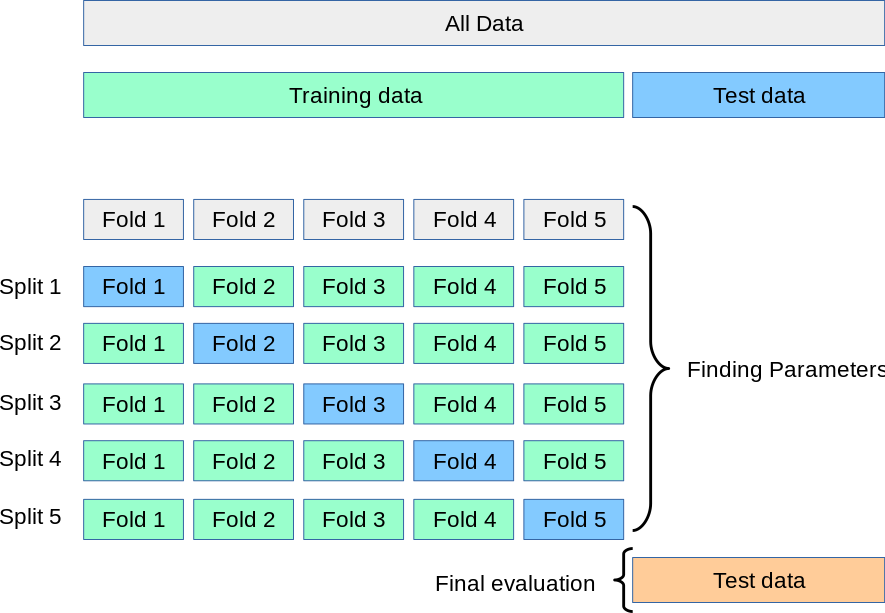

### **SMOTE**

![image](https://res.cloudinary.com/practicaldev/image/fetch/s--j9kKUFa5--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://miro.medium.com/max/700/1*bSOwLuDleEEGiuw7PtooOQ.png)

## **Tuning the benchmark Logistic Regression Model**

**Kita akan menggunakan logistic regression dengan mengunakan oversampling technique smote.**
ini kita lakukan sebagai pengujian algoritma selain menggunakan adaboost_smote. 

In [49]:
# resampler
smote = SMOTE(random_state=0)

# model
logreg = LogisticRegression(random_state=0, class_weight='balanced')



pipe_prep_model = Pipeline([
    ('transform', transformer),
    ('balancing', smote),
    ('model', logreg)
])



# Hyperparameter space
hyperparam_space = {
    'model__C':[10000,1000,100, 10, 1, 0.1, 0.01, 0.001, 0.0001,0.00001],
    'model__solver':['liblinear','newton-cg'],
    'model__class_weight' : [None, 'balanced'],
    'model__penalty' : ['l2','l1','elasticnet',]
}

# Hyperparameter tuning
grid_search = GridSearchCV(
    pipe_prep_model, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = 5, # evaluation method
    scoring = 'recall', # metrics
    n_jobs = -1 # use all cores
)

# randomsearch = RandomizedSearchCV(
#     estimator = pipe_prep_model,
#     param_distributions=  hyperparam_space_xgbc,
#     scoring = 'recall',
#     n_jobs = -1,
#     cv = 5,
#     n_iter=500)

In [50]:
# Fitting
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_const_onehot',
                                                                         Pipeline(steps=[('imp_constant',
                                                                                          SimpleImputer(fill_value='undetected',
                                                                                                        strategy='constant')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['Gender',
                                                                          'Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel',
                                                                          'Group_Duration']),
                                                                        ('binary_encod...
                                                                          'Sales',
                                                                          'Commision'])])),
                                       ('balancing', SMOTE(random_state=0)),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001,
                                      0.0001, 1e-05],
                         'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2', 'l1', 'elasticnet'],
                         'model__solver': ['liblinear', 'newton-cg']},
             scoring='recall')

In [51]:
grid_search.best_estimator_

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_const_onehot',
                                                  Pipeline(steps=[('imp_constant',
                                                                   SimpleImputer(fill_value='undetected',
                                                                                 strategy='constant')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender', 'Agency Type',
                                                   'Distribution Channel',
                                                   'Group_Duration']),
                                                 ('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Group_Age',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': infant    0
child     1
adults    2
senior    3
dtype: int64}]),
                                                  ['Group_Age']),
                                                 ('robust', RobustScaler(),
                                                  ['Net Sales',
                                                   'Commision'])])),
                ('balancing', SMOTE(random_state=0)),
                ('model',
                 LogisticRegression(C=0.0001, penalty='l1', random_state=0,
                                    solver='liblinear'))])

In [52]:
grid_search.best_score_

0.7642823749415616

In [53]:
grid_search.best_params_

{'model__C': 0.0001,
 'model__class_weight': None,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [54]:
best_logreg = pd.DataFrame(grid_search.cv_results_)
best_logreg.sort_values(by='rank_test_score', ascending=True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
98,0.289597,0.033100,0.036915,0.002659,0.00010,None,l1,liblinear,"{'model__C': 0.0001, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}",0.706522,0.688172,0.741935,0.891304,0.793478,0.764282,0.072959,1
104,0.294453,0.017030,0.036132,0.004505,0.00010,balanced,l1,liblinear,"{'model__C': 0.0001, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'liblinear'}",0.706522,0.688172,0.741935,0.891304,0.793478,0.764282,0.072959,1
108,0.331443,0.018203,0.037574,0.007755,0.00001,None,l2,liblinear,"{'model__C': 1e-05, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear'}",0.663043,0.795699,0.741935,0.739130,0.804348,0.748831,0.050557,3
114,0.343827,0.023733,0.038873,0.001646,0.00001,balanced,l2,liblinear,"{'model__C': 1e-05, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'liblinear'}",0.663043,0.795699,0.741935,0.739130,0.804348,0.748831,0.050557,3
43,0.933523,0.103989,0.045712,0.005573,10.00000,balanced,l2,newton-cg,"{'model__C': 10, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'newton-cg'}",0.641304,0.709677,0.688172,0.684783,0.706522,0.686092,0.024436,5


### **8. Predict to Test**

### **Before Tuning**

In [55]:
# define model
logreg = LogisticRegression(random_state=0, class_weight='balanced')
smote = SMOTE(random_state=0)

# pipeline trans -> modeling
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('balancing', smote),
    ('modeling', logreg)
])

# fitting
pipe_prep_model.fit(X_train, y_train)

# predict
y_pred_train_before = pipe_prep_model.predict(X_train)
y_pred_test_before = pipe_prep_model.predict(X_test)


# accuracy
score_train_before = recall_score(y_train, y_pred_train_before)
score_test_before = recall_score(y_test, y_pred_test_before)

In [56]:
print(score_train_before)
print(score_test_before)

0.6883116883116883
0.6173913043478261


### **After Tuning**

In [57]:
grid_search.best_params_

{'model__C': 0.0001,
 'model__class_weight': None,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [58]:
# Model LogReg after tuning
model = grid_search.best_estimator_
model.fit(X_train, y_train)

y_pred_train_after = model.predict(X_train)
y_pred_test_after = model.predict(X_test)

score_train_after = recall_score(y_train, y_pred_train_after) 
score_test_after = recall_score(y_test, y_pred_test_after )



In [59]:
print(score_train_after)
print(score_test_after)

0.8116883116883117
0.8434782608695652


## **10. Confusion Matrix**

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [61]:
# conf. before tuning
cm_before = confusion_matrix(y_test, y_pred_test_before)

In [62]:
# conf. after tuning
cm_after = confusion_matrix(y_test, y_pred_test_after)

In [63]:
cm_before, cm_after

(array([[5803, 1397],
        [  44,   71]], dtype=int64),
 array([[3011, 4189],
        [  18,   97]], dtype=int64))

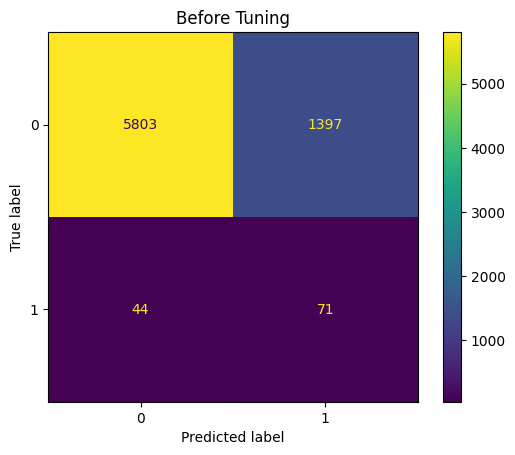

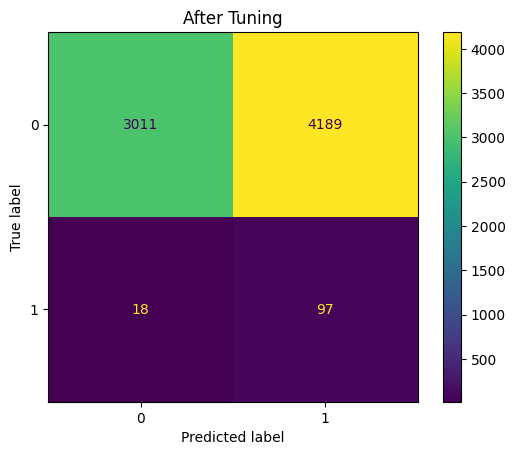

In [64]:
# # before tuning
# plt.figure(figsize=(10,6))
# plt.subplot(1,2,1)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before)
disp_before.plot()
plt.title('Before Tuning')

# after tuning
# plt.subplot(1,2,2)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after)
disp_after.plot()
plt.title('After Tuning')

plt.show()

Kesimpulan:
- Berdasarkan hasil modeling yang telah dilakukan didapatkan bahwa cost/ kerugian perusahaan sebesar:

1. Sebelum Tuning
- FP = 5803 x $200 = $279.400
- FN = 44 x $5054 = $222.376
- Total = $501.776

2. Setelah Tuning
- FP = 4189 x $200 = $837.800 
- FN = 18 x $5054 = $90.972 
- Total = $928.772
